In [1]:
import numpy as np
import pylab as plt
import networkx as nx
import scipy.integrate as integ
import math

from utils import *

%matplotlib inline

In [2]:
def kuramoto_full_theta(t, theta, B0, B1, a, omega_0, degree, weights_n, weights_e, weights_f):
    return omega_0-a*(1/np.absolute(B0).sum(1))*np.diag(we).dot(B0.dot(np.sin(B0.T.dot(theta))))-a*(1/np.absolute(B1).sum(0))*B1.T.dot(np.diag(wf).dot(np.sin(B1.dot(theta))))
#     return omega_0-a*np.diag(we).dot(B0.dot(np.sin(B0.T.dot(theta))))-a*B1.T.dot(np.diag(wf).dot(np.sin(B1.dot(theta))))

# L1w=np.diag(we).dot(B0.dot(B0.T))+B1.T.dot(np.diag(wf).dot(B1))
# L1w=B0.dot(np.diag(wn).dot(B0.T))+B1.T.dot(np.diag(wf).dot(B1))

def integrate_kuramoto_full_theta(B0, B1, theta_0, t_max, n_t, a, omega_0, degree, weights_n, weights_e, weights_f):
    
    return integ.solve_ivp(lambda t, theta: kuramoto_full_theta(t, theta, B0, B1, a, omega_0, degree, weights_n, weights_e, weights_f), [0, t_max], theta_0, t_eval = np.linspace(0, t_max, n_t),method='Radau',rtol=1.49012e-8,atol=1.49012e-8)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:137: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotl

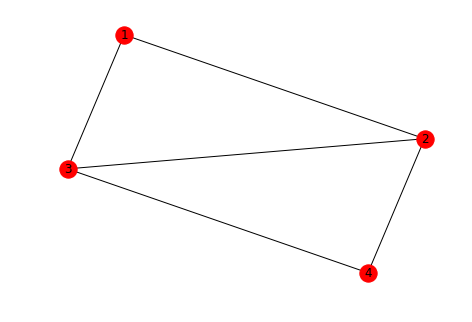

In [3]:
G=nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(2,3)
G.add_edge(2,4)
G.add_edge(3,4)

pos = nx.spring_layout(G)
plt.figure()
nx.draw(G,pos = pos,with_labels = True)

In [4]:
A=nx.adjacency_matrix(G).toarray()
# print A
Nn=len(G.nodes())
Ne=len(G.edges())
Nf=2

B0=np.zeros((Ne,Nn))
count=0
for i in range(Nn):
    for j in range(i+1,Nn):
        if(A[i,j]==1):
            B0[count,i]=1
            B0[count,j]=-1
            count+=1
# print B0
B1=np.zeros((Nf,Ne))
B1[0,:]=[1, -1, 1, 0, 0]
B1[1,:]=[0, 0, -1, 1, -1]
# print B1

L1=B0.dot(B0.T)+B1.T.dot(B1)
print L1

eigval, eigvec = np.linalg.eig(L1)
eig_sort = np.argsort(eigval)
eigval = eigval[eig_sort]
eigvec = eigvec[:,eig_sort]
print eigval

[[ 3.  0.  0. -1.  0.]
 [ 0.  3.  0.  0. -1.]
 [ 0.  0.  4.  0.  0.]
 [-1.  0.  0.  3.  0.]
 [ 0. -1.  0.  0.  3.]]
[2. 2. 4. 4. 4.]


In [5]:
wn=np.ones(Nn)
we=np.ones(Ne)
wf=np.zeros(Nf)
we[2]=2
wf[0]=we[0]*we[1]*we[2]
wf[1]=we[2]*we[3]*we[4]

L1wdwn=np.diag(we).dot(B0.dot(B0.T))
L1wup=B1.T.dot(np.diag(wf).dot(B1))
L1w=L1wdwn+L1wup

eigval, eigvec = np.linalg.eig(L1w)
eig_sort = np.argsort(eigval)
eigval = eigval[eig_sort]
eigvec = eigvec[:,eig_sort]

print "L1dwn:", L1wdwn
print "L1up:", L1wup
print eigval

L1dwn: [[ 2.  1. -1. -1.  0.]
 [ 1.  2.  1.  0. -1.]
 [-2.  2.  4.  2. -2.]
 [-1.  0.  1.  2.  1.]
 [ 0. -1. -1.  1.  2.]]
L1up: [[ 2. -2.  2.  0.  0.]
 [-2.  2. -2.  0.  0.]
 [ 2. -2.  4. -2.  2.]
 [ 0.  0. -2.  2. -2.]
 [ 0.  0.  2. -2.  2.]]
[2. 4. 4. 6. 8.]


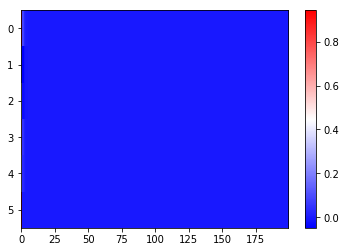

In [26]:
np.random.seed(seed=4444)

theta_0=np.random.rand(Ne)
omega_0=0#np.ones(Ne)*0

degree=np.absolute(B0).sum(0)
a=1

t_max = 1000 #integration time
n_t = 200 #number of timepoints 

wn=np.ones(Nn)
we=np.ones(Ne)
wf=np.ones(Nf)
we[2]=0.1
wf[0]=we[0]*we[1]*we[2]
wf[1]=we[2]*we[3]*we[4]

result=integrate_kuramoto_full_theta(B0, B1, theta_0, t_max, n_t, a, omega_0, degree, wn, we, wf)

times = result.t
theta = result.y

plt.figure()
plt.imshow(theta, aspect='auto',cmap='bwr')
plt.colorbar()

In [7]:
L1w=np.diag(we).dot(B0.dot(B0.T))+B1.T.dot(np.diag(wf).dot(B1))

eigval, eigvec = np.linalg.eig(L1w)
eig_sort = np.argsort(eigval)
eigval = eigval[eig_sort]
eigvec = eigvec[:,eig_sort]
print eigval

[0.2 0.4 2.  2.2 4. ]


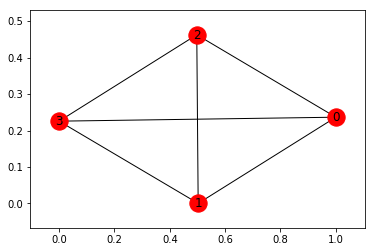

In [8]:
G=nx.complete_graph(4)

pos = nx.spring_layout(G)
# plt.figure()
# nx.draw(G,pos = pos,with_labels = True)
nx.draw_networkx(G, pos=pos)

In [9]:
A=nx.adjacency_matrix(G).toarray()
# print A
Nn=len(G.nodes())
Ne=len(G.edges())
Nf=4

B0=np.zeros((Ne,Nn))
count=0
for i in range(Nn):
    for j in range(i+1,Nn):
        if(A[i,j]==1):
            B0[count,i]=1
            B0[count,j]=-1
            count+=1
# print B0
B1=np.zeros((Nf,Ne))
B1[0,:]=[1, -1, 0, 1, 0, 0] #123
B1[1,:]=[1, 0, -1, 0, 1, 0] #124
B1[2,:]=[0, 1, -1, 0, 0, 1] #143
B1[3,:]=[0, 0, 0, 1, -1, 1] #243
# print B1

L1=B0.dot(B0.T)+B1.T.dot(B1)
print L1

eigval, eigvec = np.linalg.eig(L1)
eig_sort = np.argsort(eigval)
eigval = eigval[eig_sort]
eigvec = eigvec[:,eig_sort]
print eigval

[[4. 0. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0. 0.]
 [0. 0. 4. 0. 0. 0.]
 [0. 0. 0. 4. 0. 0.]
 [0. 0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 0. 4.]]
[4. 4. 4. 4. 4. 4.]


In [10]:
wn=np.ones(Nn)
we=np.ones(Ne)
wf=np.zeros(Nf)
we[2]=0.01
we[3]=0.01
wf[0]=we[0]*we[1]*we[3]
wf[1]=we[1]*we[2]*we[5]
wf[2]=we[0]*we[2]*we[4]
wf[3]=we[3]*we[4]*we[5]

L1wdwn=np.diag(we).dot(B0.dot(B0.T))
L1wup=B1.T.dot(np.diag(wf).dot(B1))
L1w=L1wdwn+L1wup

eigval, eigvec = np.linalg.eig(L1w)
eig_sort = np.argsort(eigval)
eigval = eigval[eig_sort]
eigvec = eigvec[:,eig_sort]

print "L1dwn:", L1wdwn
print "L1up:", L1wup
print eigval

L1dwn: [[ 2.    1.    1.   -1.   -1.    0.  ]
 [ 1.    2.    1.    1.    0.   -1.  ]
 [ 0.01  0.01  0.02  0.    0.01  0.01]
 [-0.01  0.01  0.    0.02  0.01 -0.01]
 [-1.    0.    1.    1.    2.    1.  ]
 [ 0.   -1.    1.   -1.    1.    2.  ]]
L1up: [[ 0.02 -0.01 -0.01  0.01  0.01  0.  ]
 [-0.01  0.02 -0.01 -0.01  0.    0.01]
 [-0.01 -0.01  0.02  0.   -0.01 -0.01]
 [ 0.01 -0.01  0.    0.02 -0.01  0.01]
 [ 0.01  0.   -0.01 -0.01  0.02 -0.01]
 [ 0.    0.01 -0.01  0.01 -0.01  0.02]]
[0.04 0.04 0.04 2.02 2.02 4.  ]


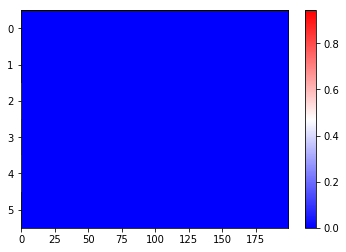

In [27]:
np.random.seed(seed=4444)

theta_0=np.random.rand(Ne)
omega_0=0#np.ones(Ne)*0

degree=np.absolute(B0).sum(0)
a=1

t_max = 1000 #integration time
n_t = 200 #number of timepoints 

wn=np.ones(Nn)
we=np.ones(Ne)
wf=np.ones(Nf)
we[2]=1
we[3]=1
wf[0]=we[0]*we[1]*we[3]
wf[1]=we[1]*we[2]*we[5]
wf[2]=we[0]*we[2]*we[4]
wf[3]=we[3]*we[4]*we[5]

result=integrate_kuramoto_full_theta(B0, B1, theta_0, t_max, n_t, a, omega_0, degree, wn, we, wf)

times = result.t
theta = result.y

plt.figure()
plt.imshow(theta, aspect='auto',cmap='bwr')
plt.colorbar()

In [12]:
L1w=np.diag(we).dot(B0.dot(B0.T))+B1.T.dot(np.diag(wf).dot(B1))

eigval, eigvec = np.linalg.eig(L1w)
eig_sort = np.argsort(eigval)
eigval = eigval[eig_sort]
eigvec = eigvec[:,eig_sort]
print eigval

[4. 4. 4. 4. 4. 4.]


In [13]:
def ntri(A):
    # signed incidence matrices for triangles
    Nn=A.shape[0]
    Ne=int(np.sum(A)/2)
    #print Nn, Ne

    e=np.zeros((Ne,2))
    count=0;
    for i in range(Nn):
        for j in range(i+1,Nn):
            if(A[i,j]>0):
                e[count,0]=i
                e[count,1]=j
                count+=1
    print "edges"
    print e
    I=np.zeros((Ne,Nn))
    for i in range(Ne):
        I[i,int(e[i,0])]=1
        I[i,int(e[i,1])]=-1
    #print I

    Nf=0
    for i in range(Nn):
        for j in range(i+1,Nn):
            for k in range(j+1,Nn):
                subA=A[np.ix_([i,j,k],[i,j,k])]
                if(np.sum(subA)==6):
                    Nf+=1
    f=np.zeros((Nf,3))
    count=0
    for i in range(Nn):
        for j in range(i+1,Nn):
            for k in range(j+1,Nn):
                subA=A[np.ix_([i,j,k],[i,j,k])]
                if(np.sum(subA)==6):
                    f[count,0]=i
                    f[count,1]=j
                    f[count,2]=k
                    count+=1
    print "faces"
    print f
    II=np.zeros((Nf,Ne))
    for i in range(f.shape[0]):
        for j in [0,-1,-2]:
            temp=np.roll(f[i,:],j)
            temp=temp[0:2]
            for k in range(e.shape[0]):
                #print e[k,:],temp
                if(((e[k,:]==temp).all())or((e[k,:]==np.roll(temp,1)).all())):
                    Irow=k
            if(temp[0]<temp[1]):
                II[i,Irow]=1
            else:
                II[i,Irow]=-1
    #print II 
    ntrie=np.sum(II,1)
    return I,II#,ntrie, e#, len(ntrie)

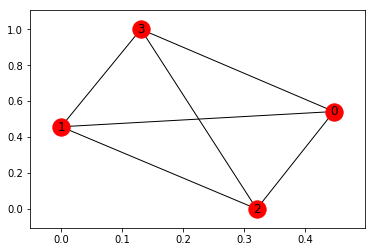

In [14]:
G=nx.complete_graph(4)

nx.draw_networkx(G)

In [15]:
A=nx.to_numpy_matrix(G)
I,II=ntri(A)
print I
print II

edges
[[0. 1.]
 [0. 2.]
 [0. 3.]
 [1. 2.]
 [1. 3.]
 [2. 3.]]
faces
[[0. 1. 2.]
 [0. 1. 3.]
 [0. 2. 3.]
 [1. 2. 3.]]
[[ 1. -1.  0.  0.]
 [ 1.  0. -1.  0.]
 [ 1.  0.  0. -1.]
 [ 0.  1. -1.  0.]
 [ 0.  1.  0. -1.]
 [ 0.  0.  1. -1.]]
[[ 1. -1.  0.  1.  0.  0.]
 [ 1.  0. -1.  0.  1.  0.]
 [ 0.  1. -1.  0.  0.  1.]
 [ 0.  0.  0.  1. -1.  1.]]


edges
[[0. 1.]
 [0. 2.]
 [0. 3.]
 [1. 2.]
 [1. 3.]
 [2. 3.]]
faces
[[0. 1. 2.]
 [0. 1. 3.]
 [0. 2. 3.]
 [1. 2. 3.]]
[[ 1. -1.  0.  0.]
 [ 1.  0. -1.  0.]
 [ 1.  0.  0. -1.]
 [ 0.  1. -1.  0.]
 [ 0.  1.  0. -1.]
 [ 0.  0.  1. -1.]]
[[ 1. -1.  0.  1.  0.  0.]
 [ 1.  0. -1.  0.  1.  0.]
 [ 0.  1. -1.  0.  0.  1.]
 [ 0.  0.  0.  1. -1.  1.]]


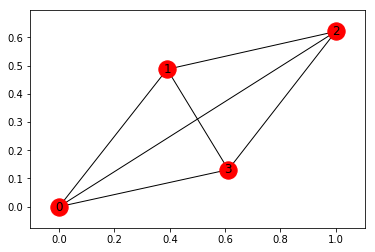

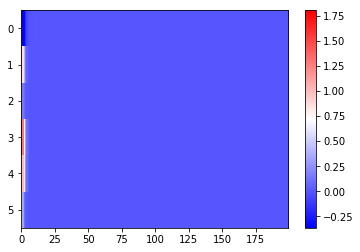

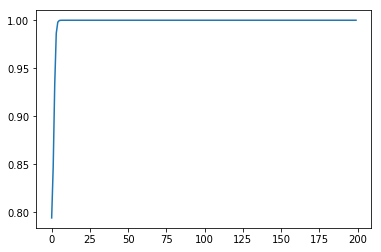

In [34]:
# no weights
G=nx.complete_graph(4)
# G=nx.cycle_graph(4)
# G.add_edge(0,2)
# plt.figure()
nx.draw_networkx(G)

A=nx.to_numpy_matrix(G)

I,II=ntri(A)
print I
print II

Nn=I.shape[1]
Ne=I.shape[0]
Nf=II.shape[0]
wn=np.ones(Nn)
we=np.ones(Ne)
wf=np.ones(Nf)

B0=I
B1=II

# np.random.seed(seed=4444)

theta_0=np.pi*np.random.rand(Ne)

omega_0=0#np.ones(Ne)*0

degree=np.absolute(B0).sum(0)
a=1

t_max = 100 #integration time
n_t = 200 #number of timepoints 

result=integrate_kuramoto_full_theta(B0, B1, theta_0, t_max, n_t, a, omega_0, degree, wn, we, wf)

times = result.t
theta = result.y

plt.figure()
plt.imshow(theta, aspect='auto',cmap='bwr')
plt.colorbar()

op=order_parameter(theta, 4, 1)
plt.figure()
plt.plot(op[0,:])